In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

fn = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        fn.append(os.path.join(dirname, filename))
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-insurance-premium-dataset/car_insurance_premium_dataset_TEST.csv
/kaggle/input/car-insurance-premium-dataset/car_insurance_premium_dataset.csv


In [3]:
df = pd.read_csv(fn[1])
df

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
0,56,32,4,17,2002,23,488.35
1,46,19,0,21,2025,0,486.15
2,32,11,4,15,2020,5,497.55
3,60,0,4,19,1991,34,498.35
4,25,7,0,13,2005,20,495.55
...,...,...,...,...,...,...,...
995,23,5,3,22,2020,5,500.00
996,43,8,3,17,2023,2,494.55
997,21,3,5,19,1998,27,506.05
998,36,18,1,23,2011,14,491.45


In [4]:
df.describe()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.575000,14.759000,2.5680,17.933000,2007.637000,17.363000,493.742250
std,13.765677,10.544292,1.6989,4.410665,10.363331,10.363331,5.909689
min,18.000000,0.000000,0.0000,11.000000,1990.000000,0.000000,477.050000
25%,30.000000,6.000000,1.0000,14.000000,1999.000000,8.000000,489.487500
50%,42.000000,13.000000,3.0000,18.000000,2008.000000,17.000000,493.950000
75%,53.000000,23.000000,4.0000,22.000000,2017.000000,26.000000,498.312500
max,65.000000,40.000000,5.0000,25.000000,2025.000000,35.000000,508.150000


In [5]:
df.columns

Index(['Driver Age', 'Driver Experience', 'Previous Accidents',
       'Annual Mileage (x1000 km)', 'Car Manufacturing Year', 'Car Age',
       'Insurance Premium ($)'],
      dtype='object')

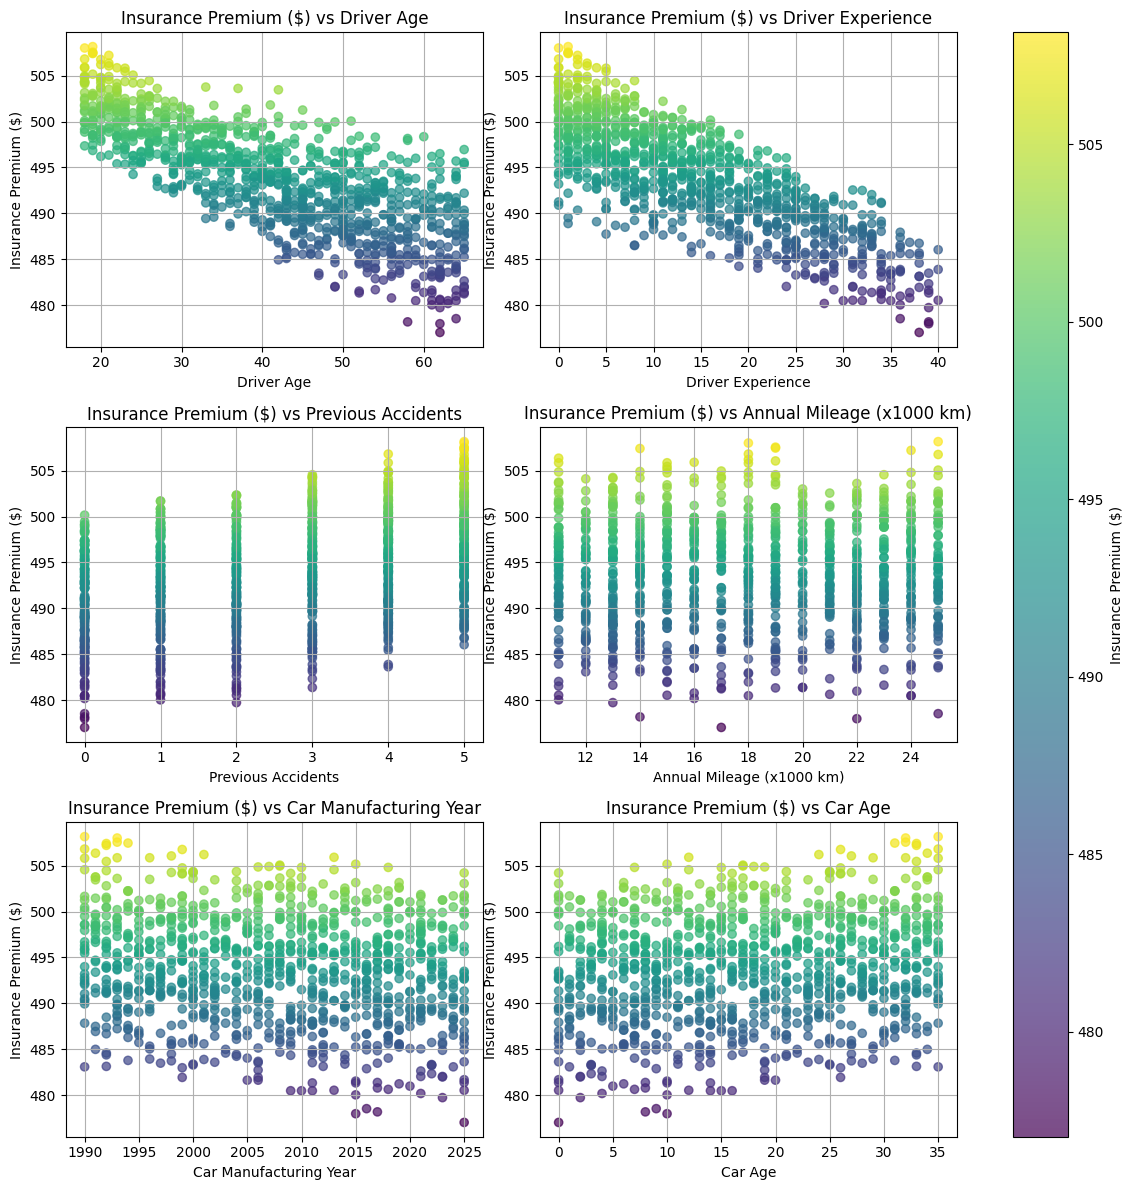

In [6]:
import matplotlib.pyplot as plt

# Define the target column for the Y-axis
target_col_index = 6  # Column to be used as Y-axis

# Calculate the number of subplots needed
num_plots = len(df.columns) - 1  # Exclude the target column
num_cols = 2  # 2 plots per row
num_rows = (num_plots + 1) // num_cols  # Rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
axes = axes.flatten()  # Flatten to simplify indexing

plot_idx = 0  # Track subplot index

for i in range(len(df.columns)):
    if i != target_col_index:
        ax = axes[plot_idx]
        scatter = ax.scatter(
            df[df.columns[i]], 
            df[df.columns[target_col_index]], 
            c=df[df.columns[target_col_index]], 
            cmap='viridis', 
            alpha=0.7
        )
        ax.set_xlabel(df.columns[i])
        ax.set_ylabel(df.columns[target_col_index])
        ax.set_title(f'{df.columns[target_col_index]} vs {df.columns[i]}')
        ax.grid(True)
        plot_idx += 1

# Remove any unused subplots
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.colorbar(scatter, ax=axes, label=df.columns[target_col_index])
plt.show()

In [7]:
df.corr()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
Driver Age,1.000000,0.607890,0.031819,0.056822,0.008187,-0.008187,-0.776848
Driver Experience,0.607890,1.000000,0.020837,-0.014424,-0.038194,0.038194,-0.803323
Previous Accidents,0.031819,0.020837,1.000000,0.007088,-0.030123,0.030123,0.410786
Annual Mileage (x1000 km),0.056822,-0.014424,0.007088,1.000000,-0.002898,0.002898,0.022131
Car Manufacturing Year,0.008187,-0.038194,-0.030123,-0.002898,1.000000,-1.000000,-0.171829
Car Age,-0.008187,0.038194,0.030123,0.002898,-1.000000,1.000000,0.171829
Insurance Premium ($),-0.776848,-0.803323,0.410786,0.022131,-0.171829,0.171829,1.000000


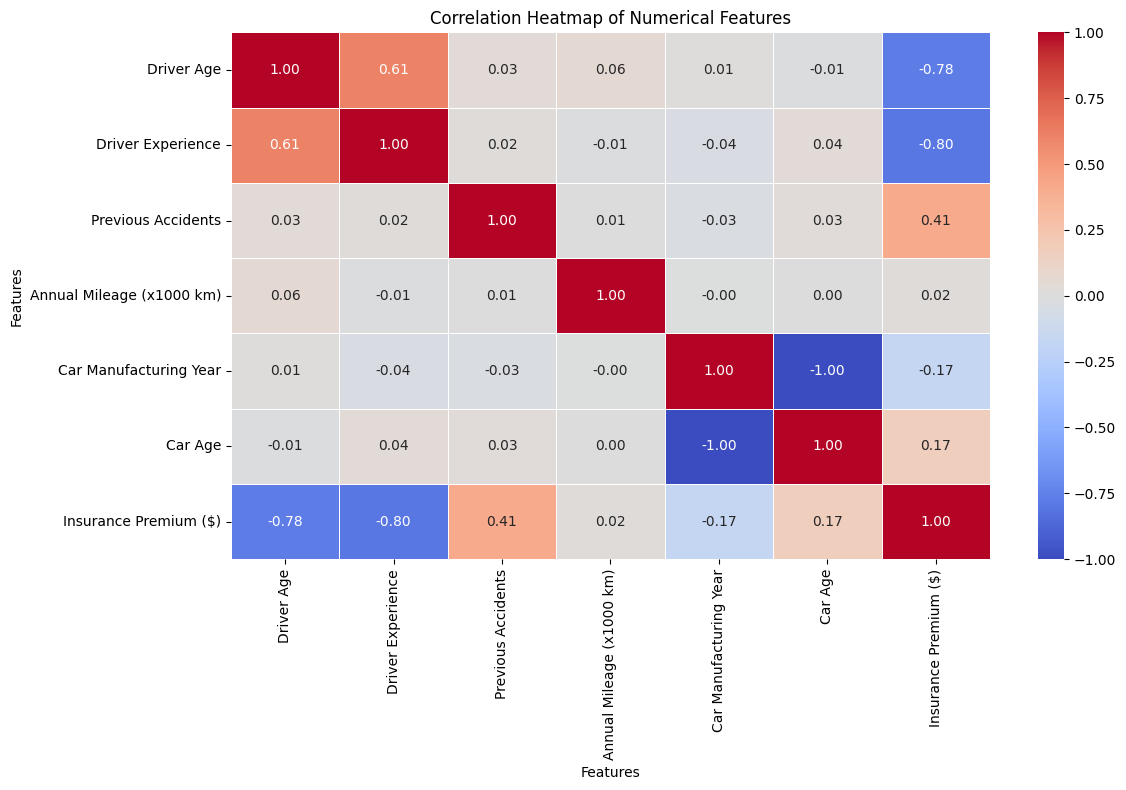

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)

# Title and axis labels
plt.title('Correlation Heatmap of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

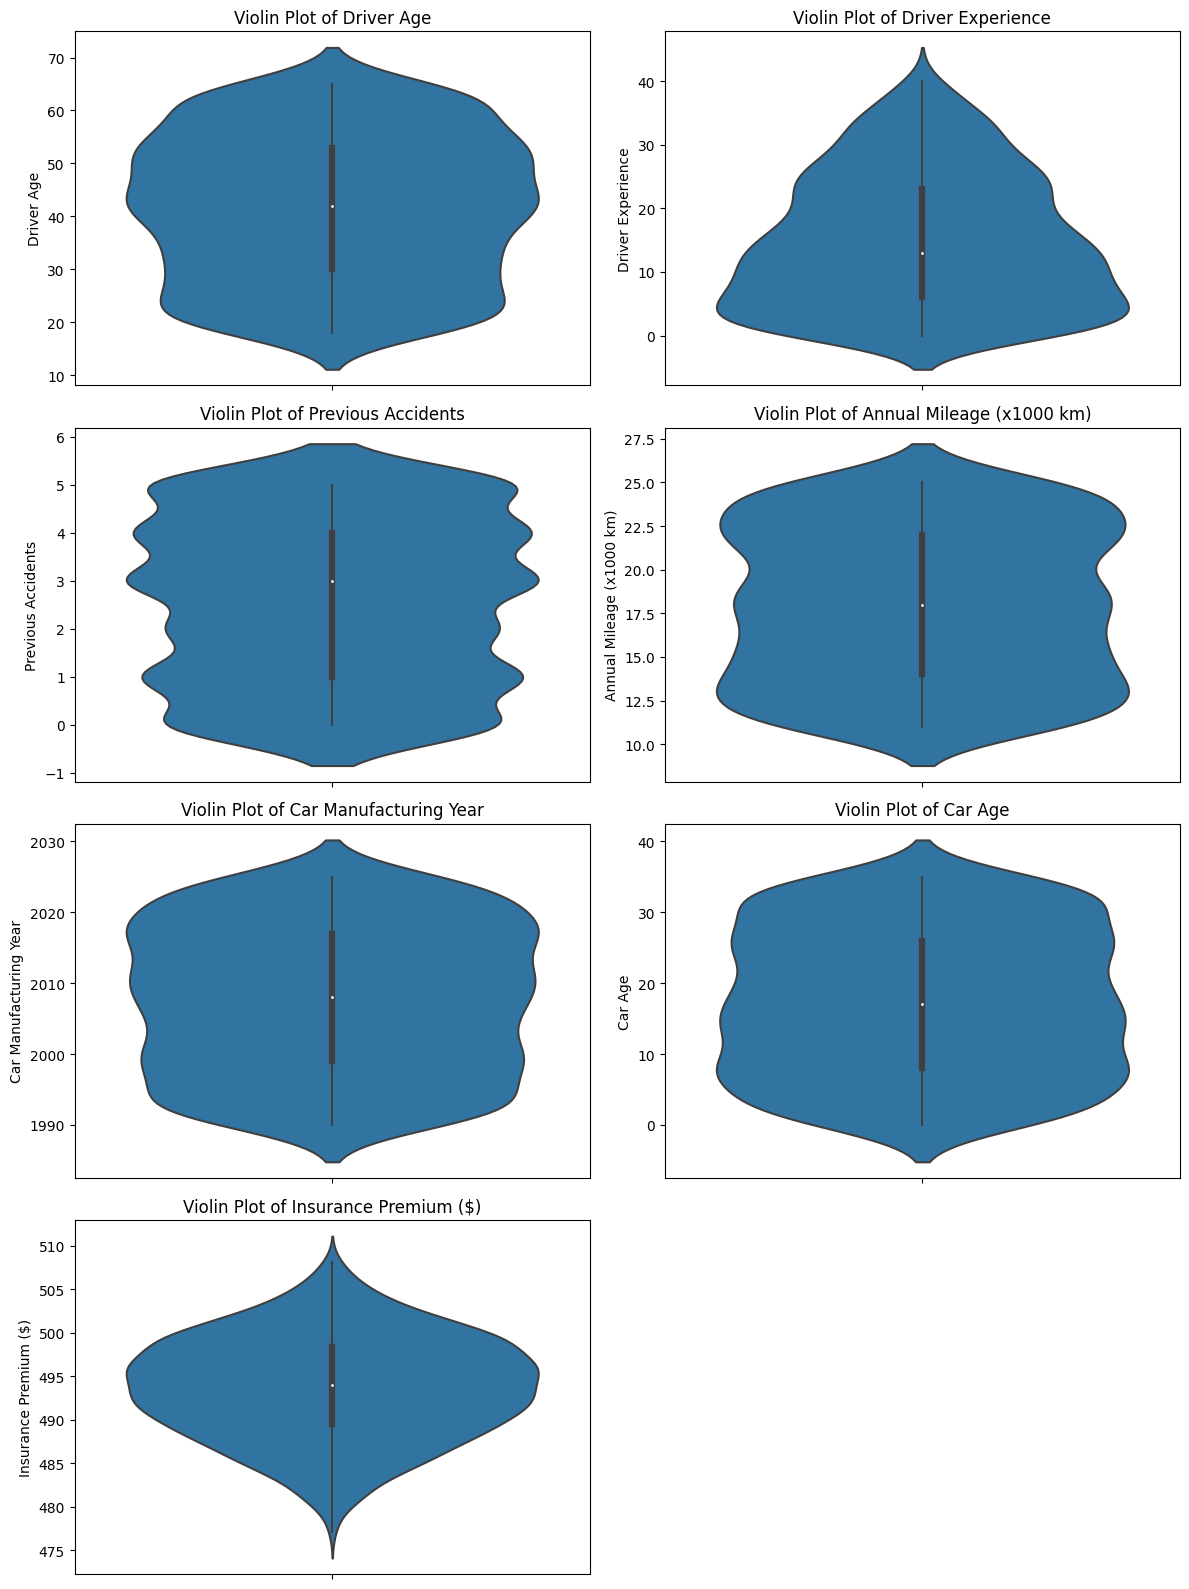

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of columns in the DataFrame
num_cols = len(df.columns)
cols_per_row = 2  # 2 plots per row
num_rows = (num_cols + 1) // cols_per_row  # Calculate number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(12, 4 * num_rows))
axes = axes.flatten()  # Flatten for easy indexing

# Plot violin plots for each column
for i, col in enumerate(df.columns):
    sns.violinplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Violin Plot of {col}')
    axes[i].set_ylabel(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

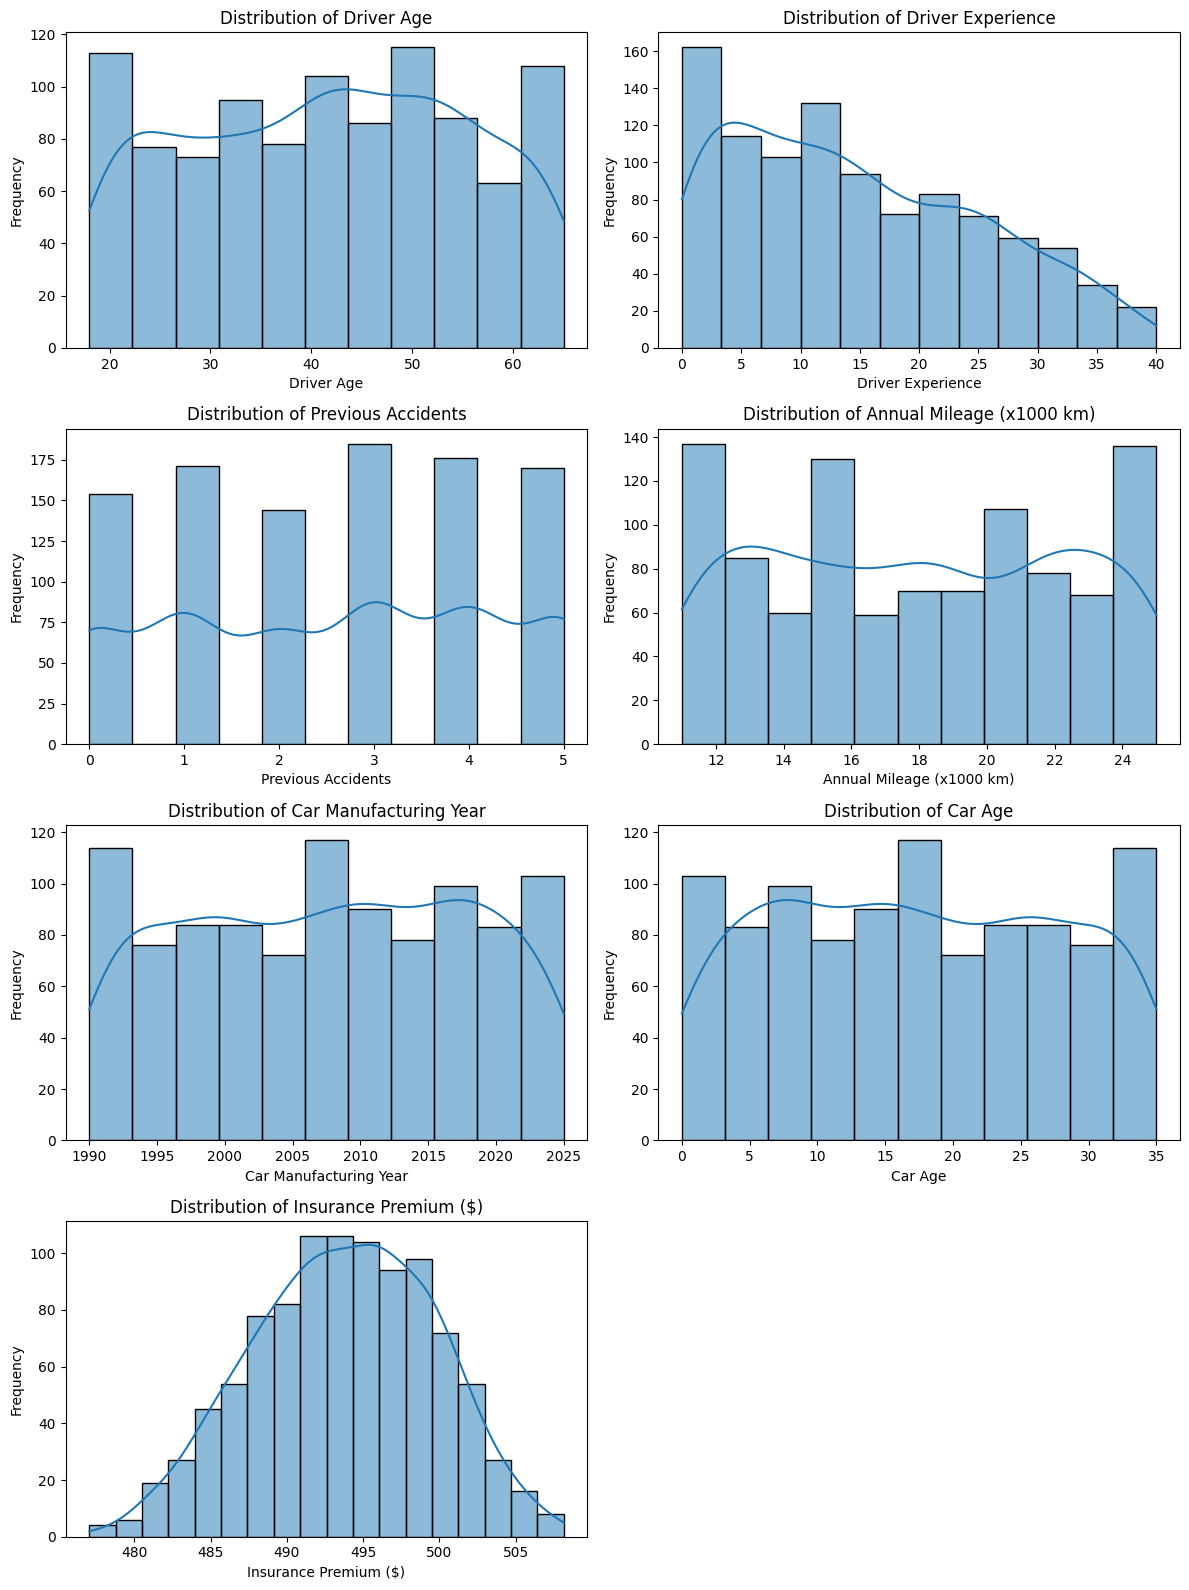

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of columns in the DataFrame
num_cols = len(df.columns)
cols_per_row = 2  # 2 plots per row
num_rows = (num_cols + 1) // cols_per_row  # Calculate number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(12, 4 * num_rows))
axes = axes.flatten()  # Flatten for easy indexing

# Plot distribution for each column
for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i])  # Use histplot with KDE
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [11]:
from scipy.stats import skew

# Calculate skewness for all numeric columns
skewness_value = skew(df, nan_policy='omit')

# Pair skewness values with their corresponding column names
for col, skew_val in zip(df.columns, skewness_value):
    print(f"Column: {col}, Skewness: {skew_val}")

Column: Driver Age, Skewness: -0.04752790188932366
Column: Driver Experience, Skewness: 0.44600619807634945
Column: Previous Accidents, Skewness: -0.06464776886612737
Column: Annual Mileage (x1000 km), Skewness: 0.019254315650320403
Column: Car Manufacturing Year, Skewness: -0.03774459266127976
Column: Car Age, Skewness: 0.03774459266129622
Column: Insurance Premium ($), Skewness: -0.12440777238994298


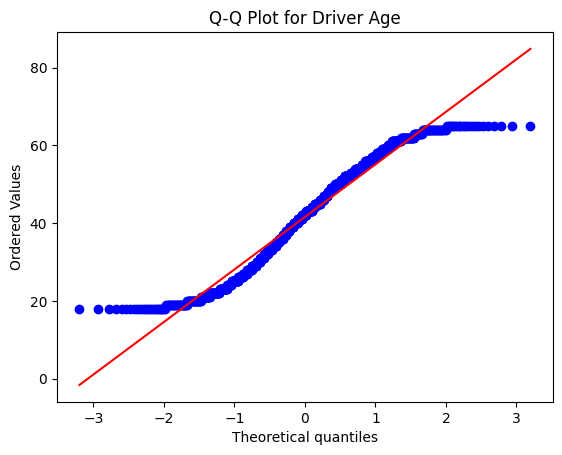

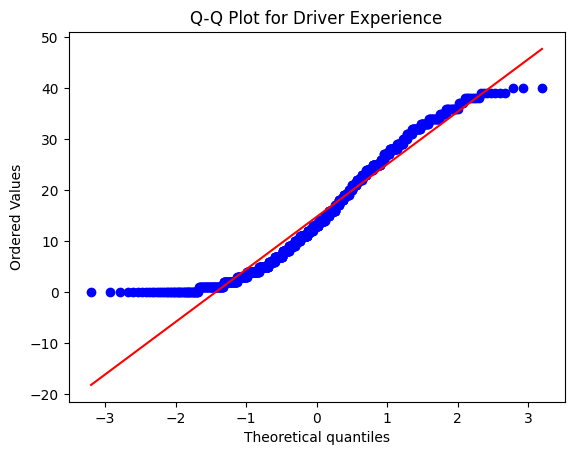

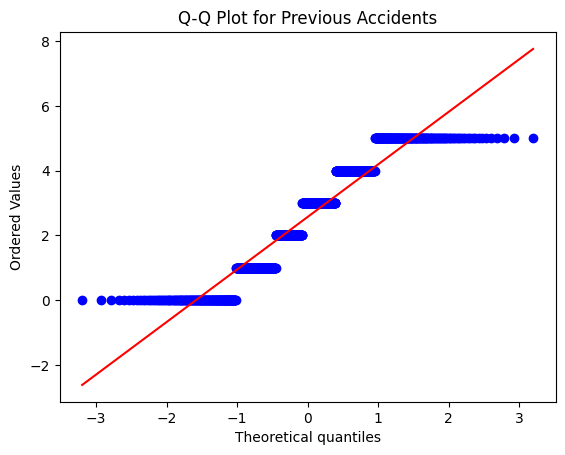

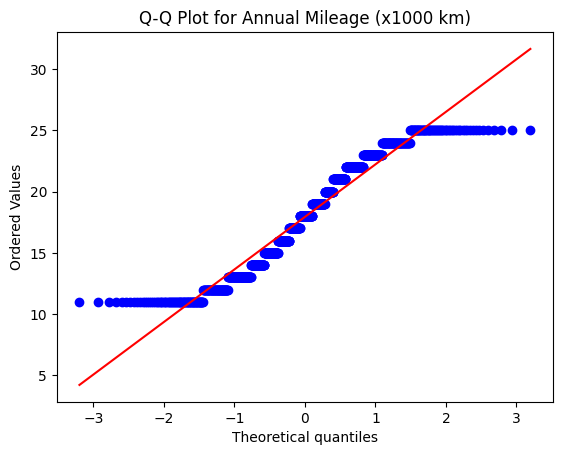

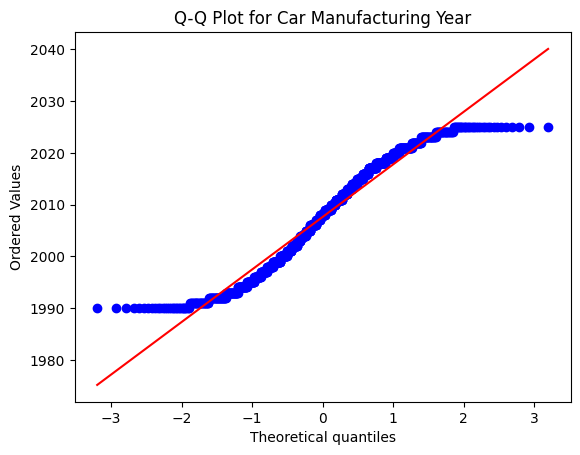

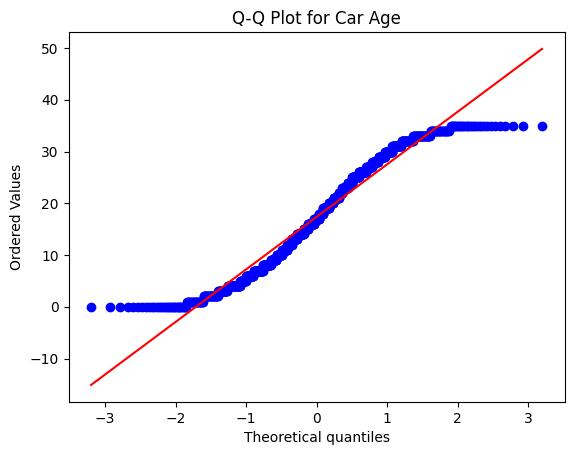

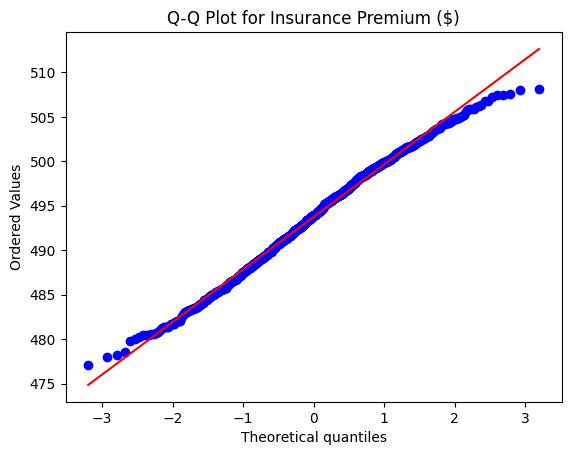

In [12]:
import scipy.stats as stats
import matplotlib.pyplot as plt

for col in df.select_dtypes(include='number').columns:
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')
    plt.show()

In [13]:
# Combined summary of null, empty, and zero values
summary = pd.DataFrame({
    'Null Values': df.isnull().sum(),
    'Empty Strings': df.apply(lambda x: (x == '').sum()),
    'Zero Values': (df == 0).sum()
})

print("Summary of Null, Empty, and Zero values:\n", summary)

Summary of Null, Empty, and Zero values:
                            Null Values  Empty Strings  Zero Values
Driver Age                           0              0            0
Driver Experience                    0              0           47
Previous Accidents                   0              0          154
Annual Mileage (x1000 km)            0              0            0
Car Manufacturing Year               0              0            0
Car Age                              0              0           32
Insurance Premium ($)                0              0            0


In [14]:
df.columns

Index(['Driver Age', 'Driver Experience', 'Previous Accidents',
       'Annual Mileage (x1000 km)', 'Car Manufacturing Year', 'Car Age',
       'Insurance Premium ($)'],
      dtype='object')

In [15]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Define feature columns (X) and target column (y)
X = df[['Driver Age', 'Driver Experience', 'Previous Accidents',
       'Annual Mileage (x1000 km)', 'Car Manufacturing Year', 'Car Age',]]
y = df['Insurance Premium ($)']

In [16]:
# Bin the continuous target to make stratification possible
y_binned = pd.qcut(y, q=4, labels=False)  # Divides y into 4 equal bins

y_binned

0      0
1      0
2      2
3      3
4      2
      ..
995    3
996    2
997    3
998    1
999    1
Name: Insurance Premium ($), Length: 1000, dtype: int64

In [17]:
# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_binned
)

# Check the split sizes
print(f"Train set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Train set size: 800
Test set size: 200


In [18]:
X_train

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age
892,32,5,1,24,2008,17
739,35,12,0,12,2018,7
286,28,1,1,16,2010,15
165,45,27,0,17,1995,30
93,62,26,5,25,1993,32
...,...,...,...,...,...,...
427,23,5,1,19,2007,18
450,64,39,2,23,2005,20
827,34,16,3,18,1999,26
212,49,22,3,24,1992,33


In [19]:
y_train

892    496.50
739    490.70
286    497.90
165    486.75
93     491.75
        ...  
427    498.15
450    481.65
827    496.40
212    492.60
805    501.20
Name: Insurance Premium ($), Length: 800, dtype: float64

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, y_train, X_test, y_test are already defined

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

print(f"Random Forest Model Mean Squared Error: {mse:.4f}")


Random Forest Model Mean Squared Error: 0.5798


In [22]:
# Create DataFrame to compare actual vs predicted and error
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Error': y_test - y_pred
})

results_df.head(10)

,Actual,Predicted,Error
97,496.55,496.5105,0.0395
919,491.55,491.3430,0.2070
3,498.35,496.6840,1.6660
798,488.25,487.8610,0.3890
488,499.45,499.6780,-0.2280
383,496.95,496.9465,0.0035
810,500.05,498.2365,1.8135
342,491.05,491.6385,-0.5885
645,490.15,490.5265,-0.3765
634,482.65,483.4340,-0.7840


In [25]:
df.columns

Index(['Driver Age', 'Driver Experience', 'Previous Accidents',
       'Annual Mileage (x1000 km)', 'Car Manufacturing Year', 'Car Age',
       'Insurance Premium ($)'],
      dtype='object')

In [23]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Define feature columns (X) and target column (y)
X = df[['Driver Experience', 'Previous Accidents',
       'Annual Mileage (x1000 km)', 'Car Manufacturing Year',]]
y = df['Insurance Premium ($)']

# Bin the continuous target to make stratification possible
y_binned = pd.qcut(y, q=4, labels=False)  # Divides y into 4 equal bins

y_binned

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_binned
)

# Check the split sizes
print(f"Train set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, y_train, X_test, y_test are already defined

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

print(f"Random Forest Model Mean Squared Error: {mse:.4f}")


Train set size: 800
Test set size: 200
Random Forest Model Mean Squared Error: 6.3916


In [24]:
# Create DataFrame to compare actual vs predicted and error
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Error': y_test - y_pred
})

results_df.head(10)

,Actual,Predicted,Error
97,496.55,493.4215,3.1285
919,491.55,492.0385,-0.4885
3,498.35,503.7195,-5.3695
798,488.25,488.9020,-0.6520
488,499.45,501.8510,-2.4010
383,496.95,494.7740,2.1760
810,500.05,503.1440,-3.0940
342,491.05,490.6435,0.4065
645,490.15,489.8700,0.2800
634,482.65,486.4865,-3.8365


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define feature columns (X) and target column (y)
X = df[['Driver Experience',  'Previous Accidents',
       'Annual Mileage (x1000 km)', 'Car Manufacturing Year',]]
y = df['Insurance Premium ($)']

# Bin the continuous target to make stratification possible
y_binned = pd.qcut(y, q=4, labels=False)  # Divides y into 4 equal bins

y_binned


# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the split sizes
print(f"Train set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, y_train, X_test, y_test are already defined

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

print(f"Random Forest Model Mean Squared Error: {mse:.4f}")


Train set size: 800
Test set size: 200
Random Forest Model Mean Squared Error: 5.5735


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define feature columns (X) and target column (y)
X = df[['Driver Experience', 'Driver Age',
        'Previous Accidents',
       'Annual Mileage (x1000 km)',
        'Car Manufacturing Year',]]
y = df['Insurance Premium ($)']

# Bin the continuous target to make stratification possible
y_binned = pd.qcut(y, q=4, labels=False)  # Divides y into 4 equal bins

y_binned


# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the split sizes
print(f"Train set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, y_train, X_test, y_test are already defined

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

print(f"Random Forest Model Mean Squared Error: {mse:.4f}")


Train set size: 800
Test set size: 200
Random Forest Model Mean Squared Error: 0.5619
